### Analysis

* Rural riders take fewer but more expensive trips.
* Urban riders take a lot more, less expensive trips.
* Over 60% of total rides and total ride fares come from Urban 
* Rural and Suburban cities rides make up around 35% of all rides and fares, but but by driver   count, only around 22% of drivers.  This could be constraining the Rural and Suburban  ride growth.


In [1]:
# Files to Load
city_data_to_load = "data/city_data.csv"
rider_data_to_load = "data/ride_data.csv"

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data into 2 dataframes.
ride_df = pd.read_csv(rider_data_to_load)
city_df = pd.read_csv(city_data_to_load)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [10]:
# Combine the data into a single dataset
combined_df = city_df.merge(ride_df, on = 'city')
combined_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [22]:
# Obtain the x and y coordinates for each of the three city types
# get the rides by city type...
urban_cities = combined_df[combined_df['type'] == 'Urban']
rural_cities = combined_df[combined_df['type'] == 'Rural']
suburban_cities = combined_df[combined_df['type'] == 'Suburban']

# gather other data for the rides, fares and driver counts
urban_ride_cnt = urban_cities.groupby(['city']).count()['ride_id']
rural_ride_cnt = rural_cities.groupby(['city']).count()['ride_id']
suburban_ride_cnt = suburban_cities.groupby(['city']).count()['ride_id']

urban_fare = urban_cities.groupby(['city']).mean()['fare']
rural_fare = rural_cities.groupby(['city']).mean()['fare']
suburban_fare = suburban_cities.groupby(['city']).mean()['fare']

urban_driver_cnt = urban_cities.groupby(['city']).mean()['driver_count']
rural_driver_cnt = rural_cities.groupby(['city']).mean()['driver_count']
suburban_driver_cnt = suburban_cities.groupby(['city']).mean()['driver_count']

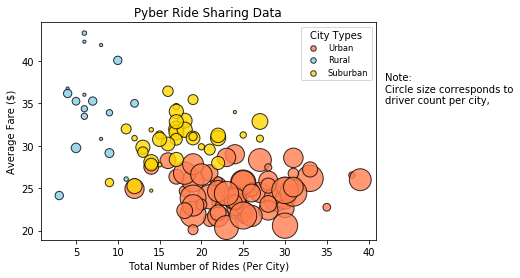

In [38]:
# Build the scatter plots for each city types
dot_scaling = 10

plt.scatter(urban_ride_cnt, urban_fare,
            s=dot_scaling*urban_driver_cnt, c='coral',
            edgecolor = 'black', linewidths=1,marker = 'o',
            alpha = 0.8, label = 'Urban')

plt.scatter(rural_ride_cnt, rural_fare,
            s=dot_scaling*rural_driver_cnt, c='skyblue',
            edgecolor = 'black', linewidths=1,marker = 'o',
            alpha = 0.8, label = 'Rural')

plt.scatter(suburban_ride_cnt, suburban_fare,
            s=dot_scaling*suburban_driver_cnt, c='gold',
            edgecolor = 'black', linewidths=1,marker = 'o',
            alpha = 0.8, label = 'Suburban')


# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data')
plt.ylabel('Average Fare ($)')
plt.xlabel('Total Number of Rides (Per City)')

# Create a legend
legend = plt.legend(fontsize='small',
                    mode='Expanded',
                    loc='best',
                    title='City Types',
                    labelspacing=0.4)
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35, 'Note:\nCircle size corresponds to\ndriver count per city,')

# Save Figure
plt.savefig('Figure1.png')


In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

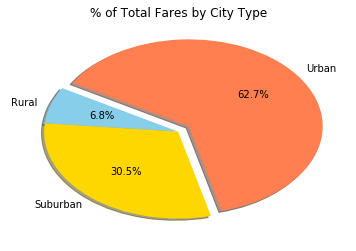

In [49]:
by_type_percent = (combined_df.groupby('type').sum()['fare'] /
                   combined_df['fare'].sum()) * 100

# Build Pie Chart
plt.pie(by_type_percent,
        labels = ['Rural', 'Suburban','Urban'],
        colors = ['skyblue','gold','coral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig('Figure2.png')


In [ ]:
# Show Figure
plt.show()

## Total Rides by City Type

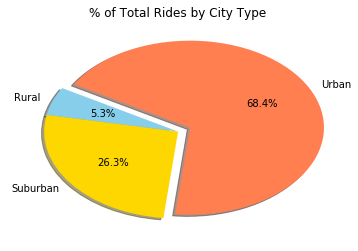

In [48]:
# Calculate Ride Percents
by_type_ride_percent = (combined_df.groupby('type').count()['ride_id'] /
                        combined_df['ride_id'].count()) * 100

# Build Pie Chart
plt.pie(by_type_ride_percent,
        labels = ['Rural', 'Suburban','Urban'],
        colors = ['skyblue','gold','coral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig('Figure3.png')

In [ ]:
# Show Figure
plt.show()

## Total Drivers by City Type

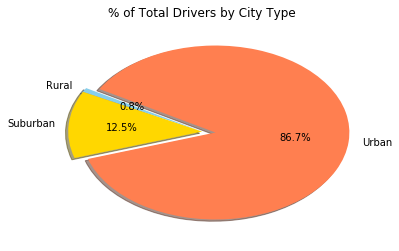

In [52]:
# Calculate Ride Percents
by_type_driver_percent = (combined_df.groupby('type').sum()['driver_count'] /
                          combined_df['driver_count'].count()) * 100

# Build Pie Chart
plt.pie(by_type_driver_percent,
        labels = ['Rural', 'Suburban','Urban'],
        colors = ['skyblue','gold','coral'],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig('Figure4.png')


In [ ]:
# Show Figure
plt.show()